https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [15]:
# Python
df = pd.read_csv('example_wp_peyton_manning.csv')

In [17]:
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [18]:
df.tail()

,ds,y
2900,2016-01-16,2483
2901,2016-01-17,10656
2902,2016-01-18,30754
2903,2016-01-19,9190
2904,2016-01-20,7269


/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAmincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


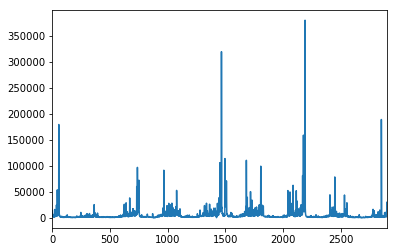

In [19]:
df["y"].plot()

In [20]:
# 対数変換(値が大きくなるとばらつきも大きくなることの対処)
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
# Python
m = Prophet()
m.fit(df)

In [6]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.498562,8.912302
3266,2017-01-16,8.534139,7.797964,9.266611
3267,2017-01-17,8.321541,7.590346,9.007228
3268,2017-01-18,8.154138,7.445247,8.904401
3269,2017-01-19,8.166091,7.489382,8.883024


/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAmincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


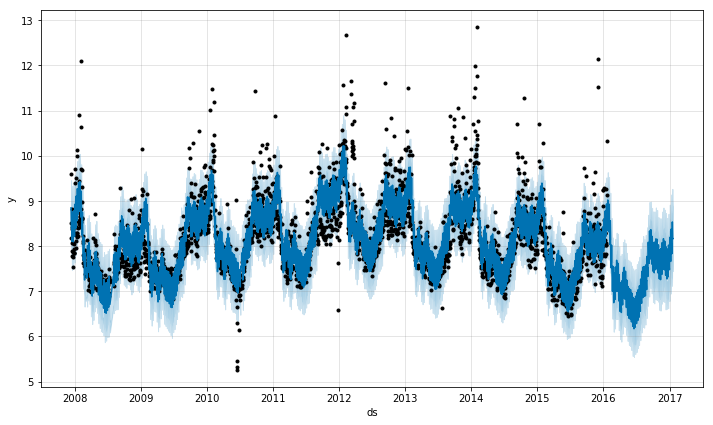

In [11]:
# Python
m.plot(forecast);

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAmincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


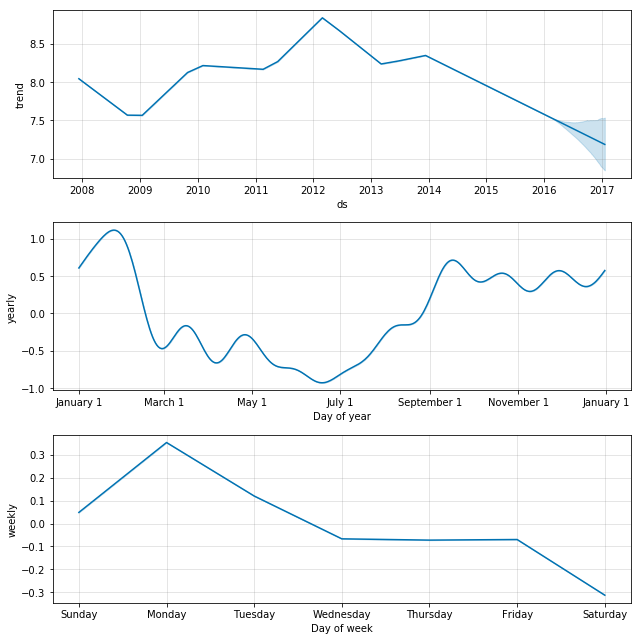

In [13]:
# Python
m.plot_components(forecast);